# **Exploratory Data Analysis**

## **What is EDA - (Exploratory Data Analysis)?**

### **Introduction**

Exploratory Data Analysis (EDA) is a process used to examine, understand and visualize data. EDA is preliminary to understanding data, discovering its key properties, and identifying possible models or hypotheses. It includes techniques aimed at uncovering trends, patterns, anomalies, and relationships in data.

**Purposes of EDA:**

*   **Understanding Data Structure:** Identifying basic statistical properties of data such as distribution, central tendencies, and variability.
*   **Identifying Anomalies and Errors:** Detecting outliers, missing data, or inconsistencies in the data.
*   **Developing Hypotheses:** Generating potential research questions and hypotheses by exploring relationships and patterns in data.
*   **Evaluating Modeling Strategies:** Determining which modeling techniques can be used based on the structure and characteristics of the data.

**Steps of EDA**

1. **Data Collection and Preprocessing**
  *   **Data Cleaning:** Filling in missing data, examining outliers and correcting them if necessary.
  *   **Data Transformation:** Standardizing or normalizing data, coding categorical data if necessary.

2. **Descriptive Statistics**
  * **Measures of Central Tendency:** Mean, median, mode, etc.
  * **Measures of Dispersion:** Variance, standard deviation, minimum, maximum, interquartile range, etc.

3. **Visualization Techniques**
  * **Univariate Analyzes:** Histograms, box plots, bar plots.
  * **Multivariate Analyzes:** Scatter plots, bivariate plots, heat maps, correlation matrices.
  * **Time Series Analysis:** Line charts to show trends over time.

4. **Examining Data Relationships**
  * **Correlation Analysis:** Correlation coefficients to measure linear relationships between variables.
  * **Crosstab Analysis:** Examining relationships between categorical variables.

**EDA Techniques**

 * **Histograms and Boxplots:** Used to understand the distribution and central tendencies of data.
 * **Scatter Plot:** Used to visualize the relationship between two variables.
 * **Box Plots:** Used to show the distribution of data and outliers.
 * **Heatmap:** Especially used to visualize correlation matrices.
 * **Pivot Table and Cross Table:** Used to summarize and examine categorical data.

**Importance of EDA**
EDA is the first step in data analysis and is a critical process for understanding and cleaning data. A good EDA increases the accuracy and efficiency of further analysis and modeling processes. Additionally, findings obtained throughout the EDA process reveal important patterns and relationships in the data, enabling more informed decisions to be made.

## **Problem Dataset Story**

Titanic was built in Belfast, England in 1912. It was designed to be the largest and most luxurious passenger ship of its time. Titanic departed Southampton on April 10, 1912, and was bound for New York. During the voyage, the ship stopped in Cherbourg, France, and Queenstown (now Cobh), Ireland. Titanic sank after hitting an iceberg off the coast of Newfoundland on April 14, 1912. This incident caused the ship to take in water and sink in just two hours. A total of 2,224 passengers and crew were on board. More than 1,500 people lost their lives following the collision. Most of the survivors varied according to factors such as class and gender. For example, women and children had a higher survival rate than men.

**The columns in the dataset are:**
* **PassengerId:** Passenger ID.
* **Survived:** Survival status (1 = Yes, 0 = No).
* **Pclass:** Ticket class (1 = First class, 2 = Second class, 3 = Third class).
* **Name:** Passenger name.
* **Sex:** Gender.
* **Age:** Age.
* **SibSp:** Number of siblings or spouses traveling with the passenger.
* **Parch:** Number of parents or children traveling with the passenger.
* **Ticket:** Ticket number.
* **Fare:** Fare paid.
* **Cabin:** Cabin number (if applicable).
* **Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

The Titanic dataset is initially used for data analysis and visualization. Various analyses can be performed on the dataset to investigate the factors affecting survival rates. Additionally, this dataset is widely used to train machine learning models. Students and researchers develop applications using various algorithms (e.g., decision trees, regression models, support vector machines) to make survival predictions.

Let's start our investigations on our data set

In [384]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**NumPy;** It is a basic library for scientific computing in Python.

**Pandas;** It is a Python library used for data analysis and data manipulation.

**Matplotlib;** It is the basic library for data visualization in Python. It is used to create line charts, bar charts, histograms, scatter plots and more.

**Seaborn;** It is a visualization library built on Matplotlib. It provides higher levels of abstraction to create more advanced and aesthetically pleasing plots than Matplotlib.

To avoid seeing some "warning" outputs;

In [385]:
warnings.filterwarnings(action='ignore')

Let's set certain display options using the Pandas library.

In [386]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

The following Python code reads data from a CSV file named "titanic.csv" and converts it into a Pandas DataFrame:

In [387]:
df = pd.read_csv("titanic.csv")

The **df.info()** command provides a quick overview of the structure of data frames. Indicates how many rows and columns the data frame contains. Specifies which columns are of which data type. Shows how many missing (NaN) values are in each column. Specifies how much memory the data frame uses.

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As you can see, there are missing values ​​in this data set. Now let's examine this missing data by visualizing it.

<Axes: >

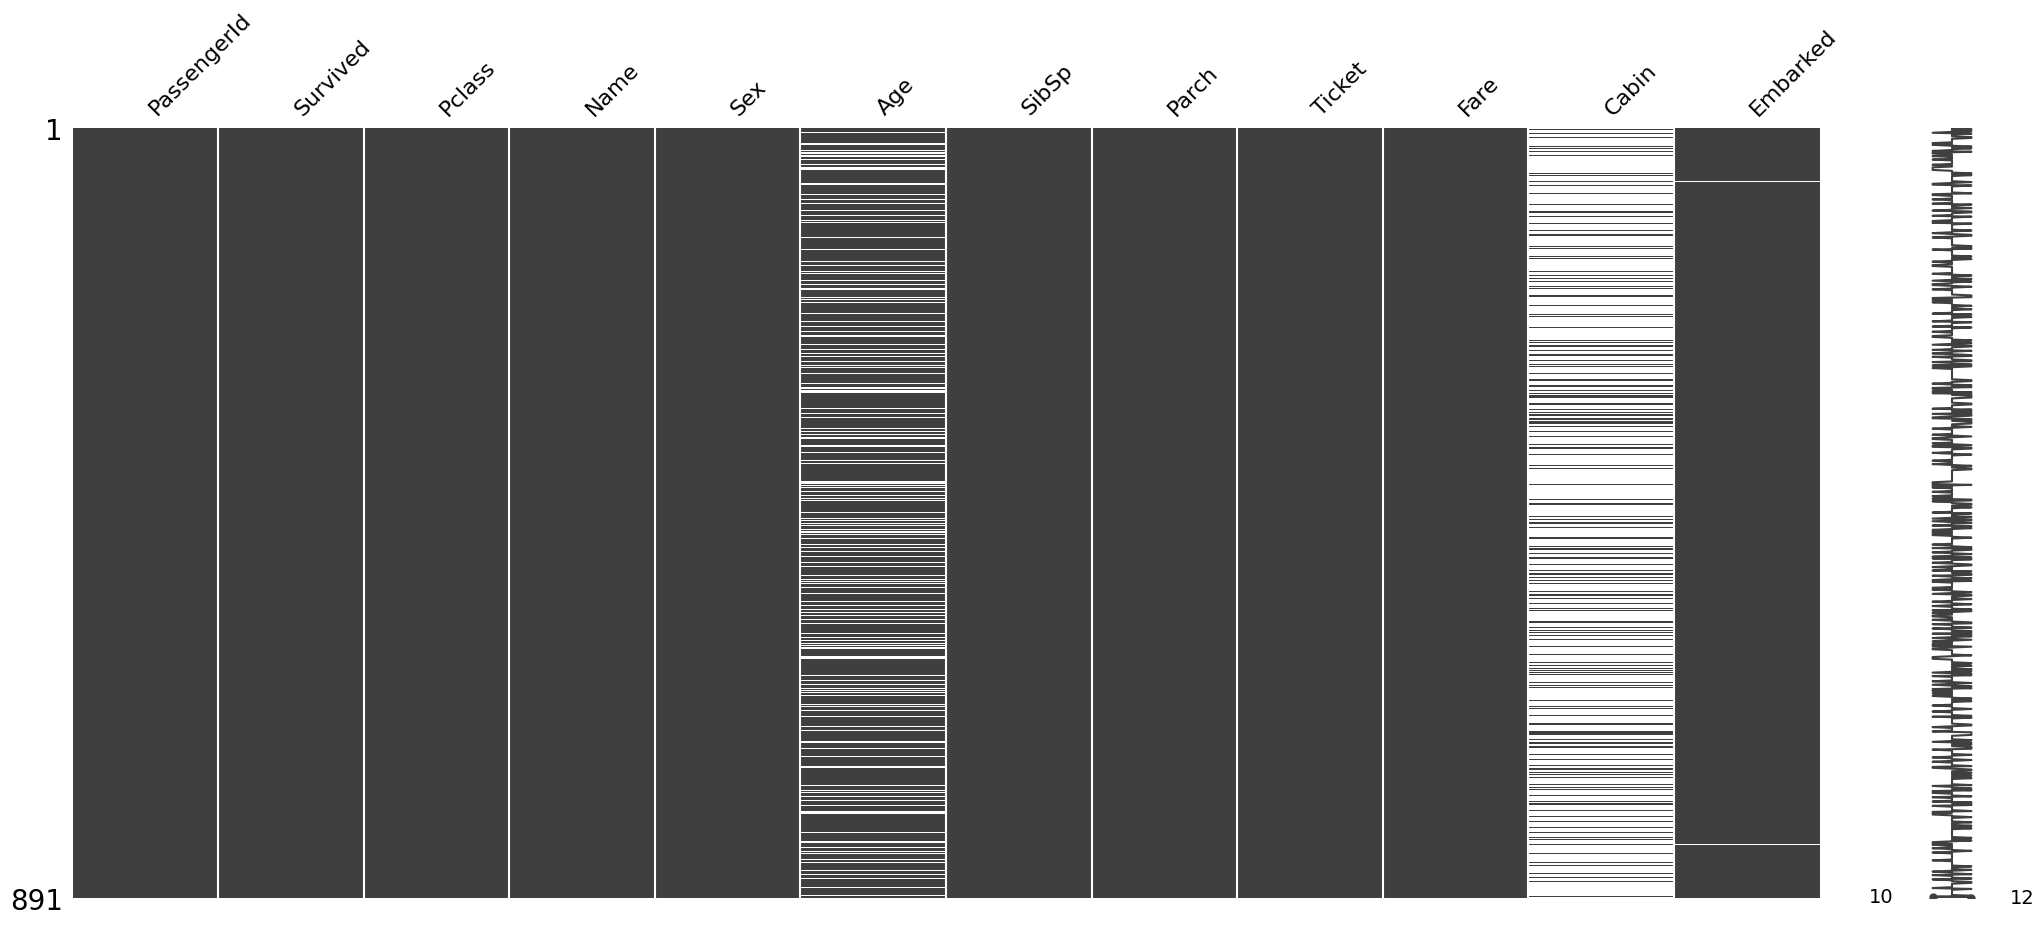

In [389]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

As can be seen, the Cabin parameter contains many missing values. There are also missing values ​​in the Age parameter. At this point, we will choose to remove the Cabin parameter from the data frame. We will also fill in the Age parameter.

We can check whether we have missing values with the **df.isnull().sum()** command.

The **df.isnull().sum()** command calculates and returns the number of missing (NaN) values in a pandas DataFrame on a per-column basis.

In [390]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The **df.describe().T** command provides basic statistical summaries. This command is used to quickly see basic statistical measurements of numerical data.

In [391]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


Statistical Measurements Provided;

* **Count:** Shows how many valid (non-missing) data are in each column.
* **Mean:** Specifies the arithmetic mean of the data in the column.
* **Std (Standard Deviation):** Shows how much spread (variability) the data in the column has.
* **Min:** Specifies the smallest value in the column.
* **25% (1st Quartile Value):** Indicates the first quartile (first quartile) of data.
* **50% (Median or 2nd Quartile Value):** Shows the median value (median) of the data.
* **75% (3rd Quarter Value):** Indicates the third quarter value of the data.
* **Max:** Shows the largest value in the column.

If we want to examine the first 10 observation units, we can use the **df.head(10)** command.

In [392]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C


If we want to examine the last 10 observation units, we can use the **df.tail(10)** command.

In [393]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.000,0,0,349257,7.896,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000,0,0,7552,10.517,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000,0,0,370376,7.750,NaN,Q


We can use the **df.shape** command to display the size of the data frame.

In [394]:
df.shape

(891, 12)

 As you can see, there are 891 observation units and 12 variables.

With the **value_counts()** method, we can examine the number of values of the Survived variable according to its classes.

In [395]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


Considering that we selected the Target variable as Survived; Let's examine the percentage rates in terms of Target In Classes.

In [396]:
100*df["Survived"].value_counts()/len(df)

,count
Survived,
0,61.616
1,38.384


Now let's define a color palette and visualize the Survived variable

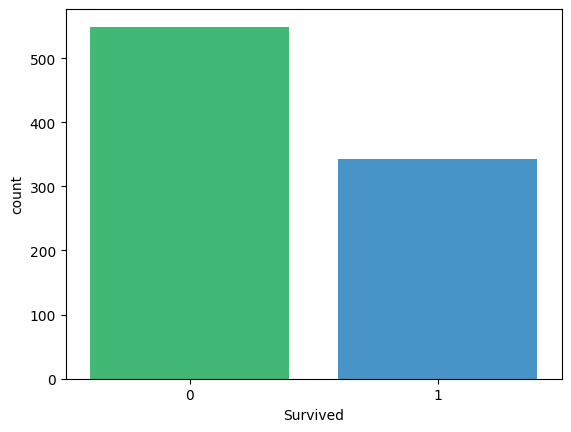

In [397]:
green_blue_palette = ["#2ecc71", "#3498db"]
sns.countplot(x="Survived", data=df, palette=green_blue_palette)
plt.show()

Let's examine it as a pie chart. Here, green color represents class 0 and orange color represents class 1.

In [398]:
import plotly.graph_objects as go
colors = ['green', 'orange']
labels = ['0','1']
values = df['Survived'].value_counts()/df['Survived'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=40,
                  marker=dict(colors=colors, line=dict(color='black', width=5)))
fig.update_layout(
    title_text="Survived")
fig.show()

Now let's look at the proportional distribution of the target variable in terms of other classes.

In [399]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [400]:
cols = ["Age", "Pclass", "SibSp", "Parch", "Fare"]
for col in cols:
    target_summary_with_num(df, "Survived", col)

            Age
Survived       
0        30.626
1        28.344


          Pclass
Survived        
0          2.532
1          1.950


          SibSp
Survived       
0         0.554
1         0.474


          Parch
Survived       
0         0.330
1         0.465


           Fare
Survived       
0        22.118
1        48.395




## **Data Cleaning and Preprocessing**

Data Cleaning and Preprocessing is the set of processes performed to make raw data sets analysable. This process is critical to the success of data analytics and machine learning projects. Raw data often contains errors, omissions, and inconsistencies. Therefore, data cleaning and preprocessing steps are necessary to improve the quality of the data and obtain more accurate results.

**1. Data Cleaning**

Data cleaning is the process of correcting errors, omissions, and inconsistencies in data.

**A-)** *Data Transformation*

*   Identifying Missing Values
*   Filling in Missing Values
  *   Mean Imputation
  *   Median Imputation
  *   Mode Imputation
  *   Forward and Backward Fill
* Deleting Missing Values

**B-)** *Feature Engineering*

* Identifying Outliers
* Correcting Outliers

**C-)** *Processing Categorical Data*

* Editing Data Formats
* Standardization of Categorical Data

**D-)** *Data Separation*

* Detection of Erroneous Data
* Correction of Erroneous Data


**2. Data Preprocessing**

Data preprocessing is the process of making cleaned data ready for analysis or modeling.

**A-)** *Data Transformation*

* Feature Scaling
  * Normalization
  * Standardization
* Log Transformation

**B-)** *Feature Engineering*

* Creating New Features
* Feature Selection
* Feature Extraction

**C-)** *Processing Categorical Data*

* Label Encoding
* One-Hot Encoding

**D-)** *Data Separation*

* Separation into Training and Test Sets


**Conclusion:** Data Cleaning and Preprocessing forms the basis of the data analysis and modeling process. These steps increase the accuracy and reliability of the data, resulting in more accurate and valid results.

We will remove the **"PassengerId"**, **Ticket** and **Name** parameters, assuming it has no meaning. And we will remove the **"Cabin"** parameter from the dataframe, since it contains too many missing values.

In [401]:
df.drop(["PassengerId", "Ticket", "Name", "Cabin"], axis=1, inplace=True)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


We prefer to fill in missing age values ​​with the median value of the available ages in the dataset. Median can be a better choice for skewed data because it is not affected by extreme values. It is not affected by extremes. It can give better results than the mean for data with skewed distributions such as age.

In [403]:
df['Age'].fillna(df['Age'].median(), inplace=True)

We prefer to fill in the missing "Embarked" values ​​with the most frequent "Embarked" category in the dataset. The most frequent port in the Titanic dataset is usually Southampton (S). It is an easy and quick method. Using the most frequent value is usually a reliable approach, especially if the number of missing data is small. This method does not take into account the true values ​​of the missing data, i.e. it makes an assumption. However, if there are very few missing values, this may be an acceptable approach.

In [404]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Now we can continue our steps by trying to detect outliers. Outlier detection is the process of identifying and analyzing data in a data set that deviates significantly from usual trends. Outliers are data that differ from the rest of the data, fall outside the norm, or disrupt the natural distribution of the data.

Now let's use the **"outlier_thresholds"** function to calculate the upper and lower threshold values. Then, let's use the **"check_outlier"** function to identify variables containing outliers.

In [405]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

Now let's create a list structure and use this list structure to detect whether there are outliers by sending it to the function with a for loop. While performing this process, I will be working with numerical data, so let's remove non-numeric data from the data frame.

In [406]:
string_columns = df.select_dtypes(include='object').columns
df_string_copy = df[string_columns].copy()
df = df.drop(columns=string_columns)

cols = [col for col in df.columns if "Survived" not in col]
for col in cols:
    print(col, check_outlier(df, col))

Pclass False
Age True
SibSp True
Parch True
Fare True


As can be seen, we detected outliers in the variables "Age", "SibSp", "Parch" and "Fare". Now let's bring in the function we need to remove these outliers and eliminate the outliers. Let's see again that the outliers have been removed.

In [407]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "Age")
replace_with_thresholds(df, "SibSp")
replace_with_thresholds(df, "Fare")

In [408]:
for col in cols:
    print(col, check_outlier(df, col))

Pclass False
Age False
SibSp False
Parch True
Fare False


Let's look at the statistics of our data set again after various operations.

In [409]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,891.000,29.039,12.072,2.500,22.000,28.000,35.000,54.500
SibSp,891.000,0.426,0.708,0.000,0.000,0.000,1.000,2.500
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,24.047,20.482,0.000,7.910,14.454,31.000,65.634


Now let's do some preprocessing on categorical variables. **Label Encoder** and **One-Hot Encoder** are two techniques used to convert categorical data into numerical form. **Label Encoder:** If there is a natural ordering between categories, that is, if the categories represent a hierarchy with respect to each other (for example: "small", "medium", "large"), it is more appropriate to use the Label Encoder method. This method assigns a number to each category. However, it can lead to misunderstandings in cases where there is no ordering. **One-Hot Encoder:** If the categories are not in order (for example: "male", "female" or "city names"), it is more appropriate to use the One-Hot Encoder. This method creates new columns representing each category with values ​​of 0 and 1.

**Label Encoder:** If the number of categories is small (e.g. 2-5 categories), Label Encoding can be simpler and more efficient. **One-Hot Encoder:** If the number of categories is large, One-Hot Encoding can split your data into too many columns, which can increase memory and processing load. In such cases, Label Encoding may be preferred.

**Tree-based models** (like Random Forest, XGBoost, LightGBM) usually work better with Label Encoder because these models automatically learn non-orderly relationships in the data. **Linear models** (like Logistic Regression, Linear Regression) usually work better with One-Hot Encoder because these models can make mistakes with non-orderly relationships.

In [410]:
df_encoded = pd.get_dummies(df_string_copy, drop_first=True)

df_final = pd.concat([df, df_encoded], axis=1)

df_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000,1.000,0,7.250,True,False,True
1,1,1,38.000,1.000,0,65.634,False,False,False
2,1,3,26.000,0.000,0,7.925,False,False,True
3,1,1,35.000,1.000,0,53.100,False,False,True
4,0,3,35.000,0.000,0,8.050,True,False,True


## **Visualization**

Visualization is the process of making data more understandable and easily interpretable by using graphical representations. This is an important tool for uncovering patterns, trends, and relationships in complex data sets. Visualization is used to convey information quickly and effectively, share analysis results, and gain deeper data insights.

**Chart Types:**

* **Histograms:** Used to visualize the distribution of data.
* **Bar Charts:** Ideal for comparing categorical data.
* **Line Charts:** Common for displaying time series data and tracking trends.
* **Scatter Plots:** Used to explore the relationship and possible correlations between two variables.
* **Pie Charts:** Used to show the percentage distribution of categorical data.
* **Box Plots:** Visualizes the central tendencies and distributions of the data.

**Conclusion:** Visualization is the process of making data more understandable and interpretable by expressing it in graphical representations. It is a critical tool for uncovering patterns and relationships in data, sharing analysis results, and making data-based decisions. An effective visualization captures the viewer's attention by representing data accurately and makes important information easy to understand.

Now let's examine the histogram graphs of our variables using the list structure we defined before. Let's define the function we need for this and draw the graphs with a for loop.

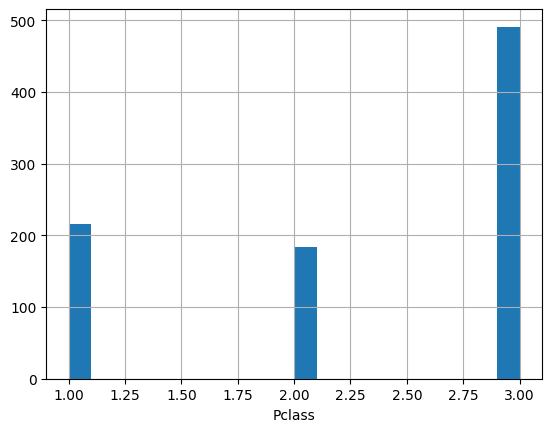

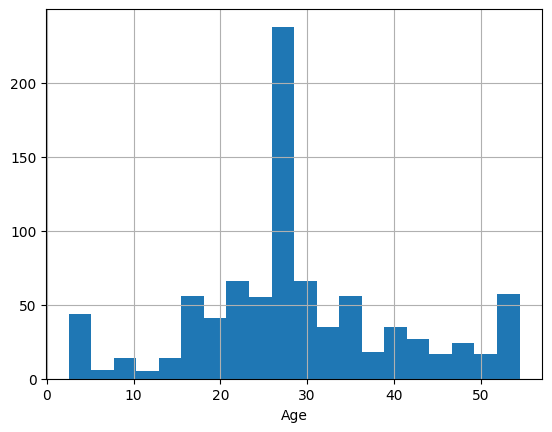

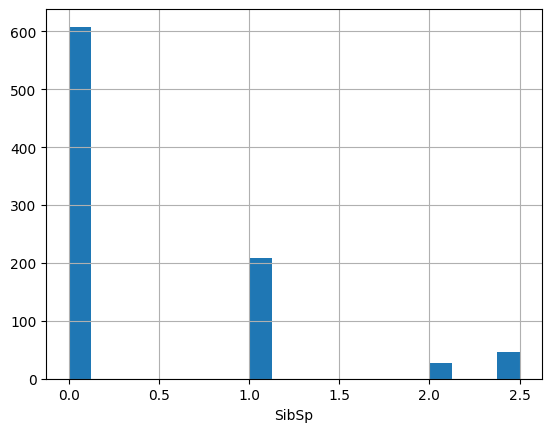

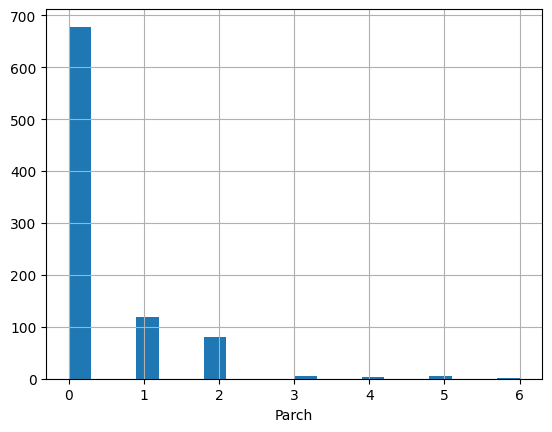

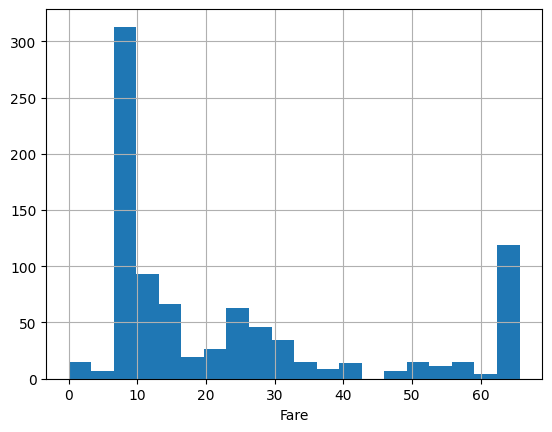

In [411]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

for col in cols:
    plot_numerical_col(df_final, col)

Scatter plots are excellent for visualizing the relationship between two numerical variables. Let's create scatter plots to explore the relationships between some of the numerical variables in the dataset.

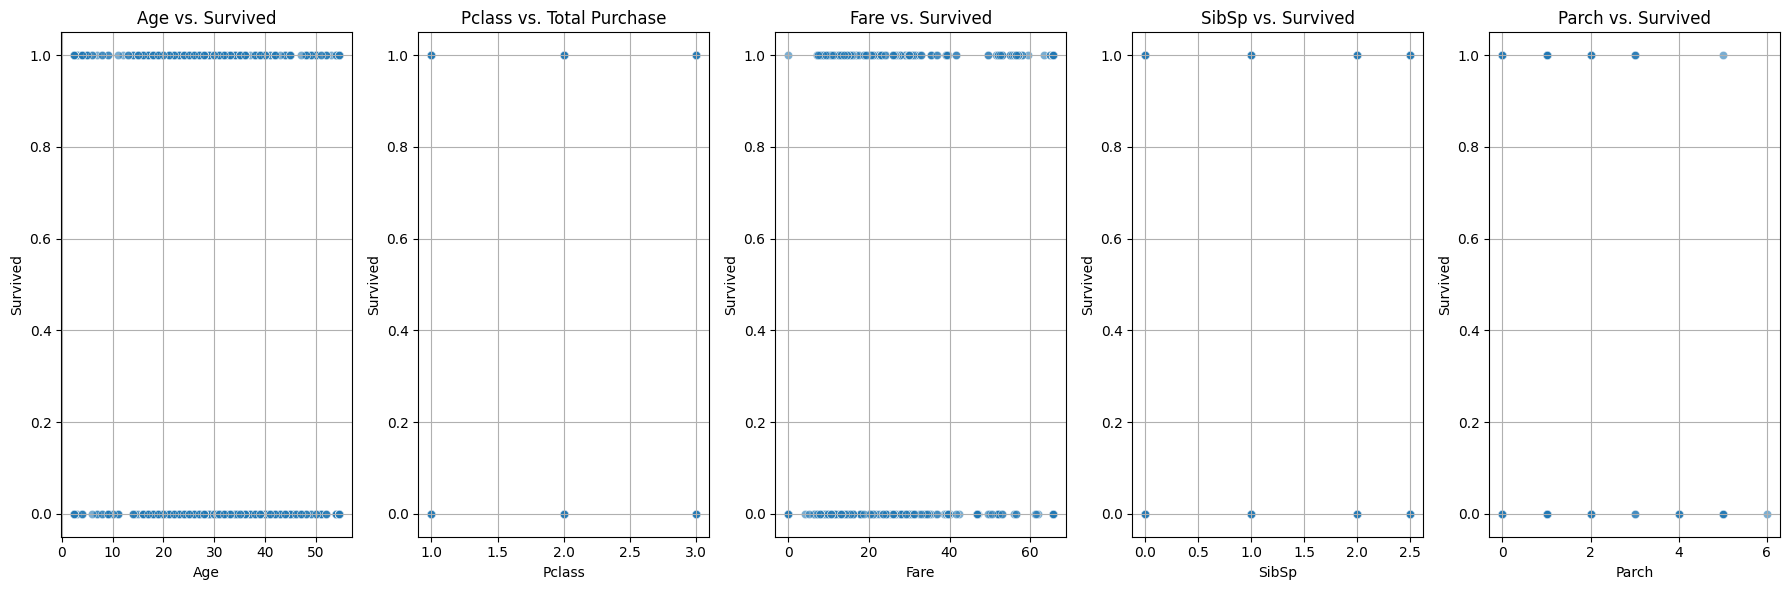

In [412]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 5, 1)
plt.scatter(df_final['Age'], df_final['Survived'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Age vs. Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.grid(True)

plt.subplot(1, 5, 2)
plt.scatter(df_final['Pclass'], df_final['Survived'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Pclass vs. Total Purchase')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.grid(True)

plt.subplot(1, 5, 3)
plt.scatter(df_final['Fare'], df_final['Survived'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Fare vs. Survived')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.grid(True)

plt.subplot(1, 5, 4)
plt.scatter(df_final['SibSp'], df_final['Survived'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('SibSp vs. Survived')
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.grid(True)

plt.subplot(1, 5, 5)
plt.scatter(df_final['Parch'], df_final['Survived'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Parch vs. Survived')
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.grid(True)

plt.tight_layout()
plt.show()

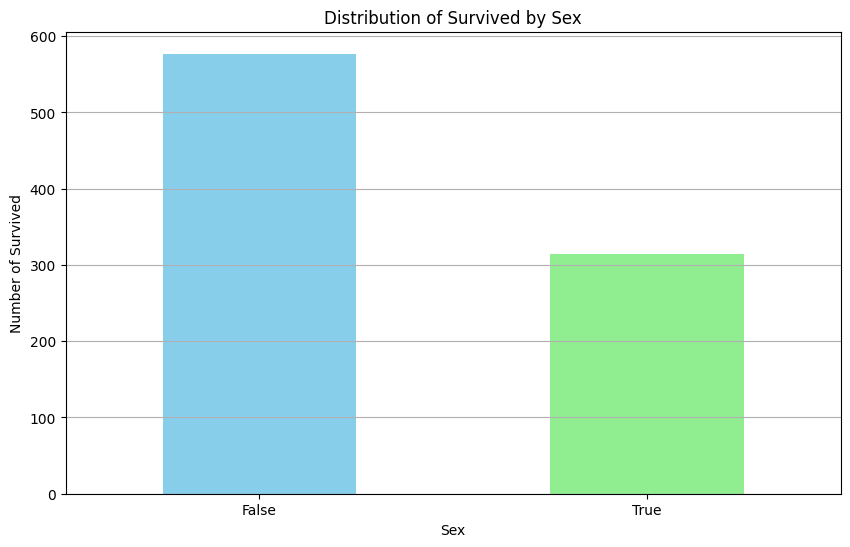

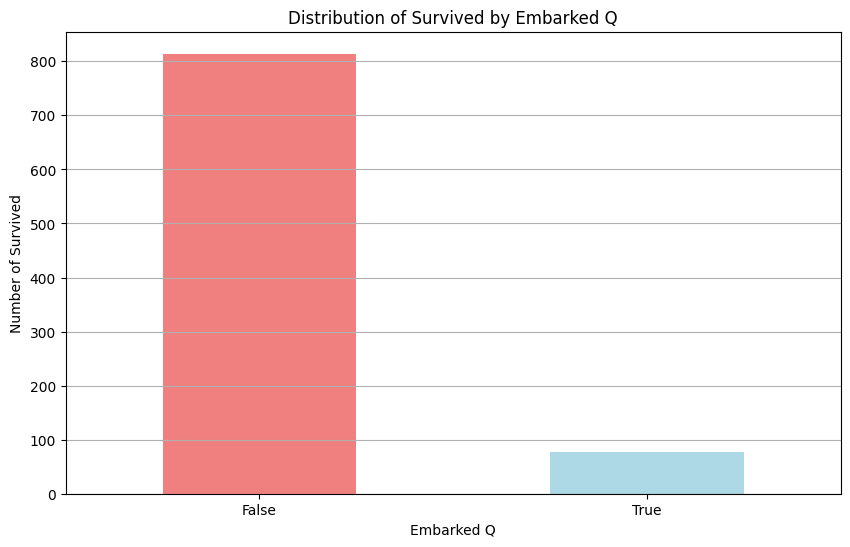

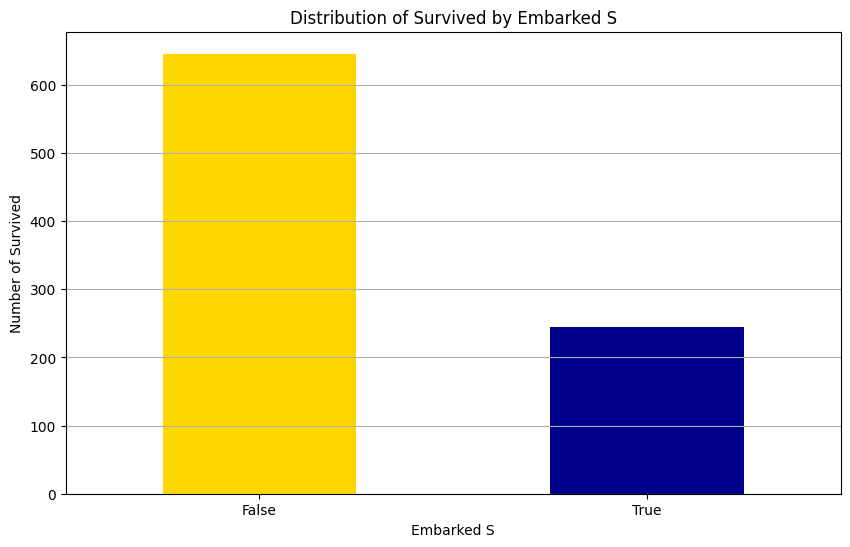

In [413]:
sex_counts = df_final['Sex_male'].value_counts()

plt.figure(figsize=(10, 6))
sex_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Survived')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.grid(axis='y')
plt.show()

Embarked_Q_counts = df_final['Embarked_Q'].value_counts()

plt.figure(figsize=(10, 6))
Embarked_Q_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribution of Survived by Embarked Q')
plt.xlabel('Embarked Q')
plt.ylabel('Number of Survived')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.grid(axis='y')
plt.show()

Embarked_S_counts = df_final['Embarked_S'].value_counts()

plt.figure(figsize=(10, 6))
Embarked_S_counts.plot(kind='bar', color=['gold', 'darkblue'])
plt.title('Distribution of Survived by Embarked S')
plt.xlabel('Embarked S')
plt.ylabel('Number of Survived')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.grid(axis='y')
plt.show()

In [414]:
import matplotlib.gridspec as gridspec
from scipy import stats

def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram Graph')

    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )

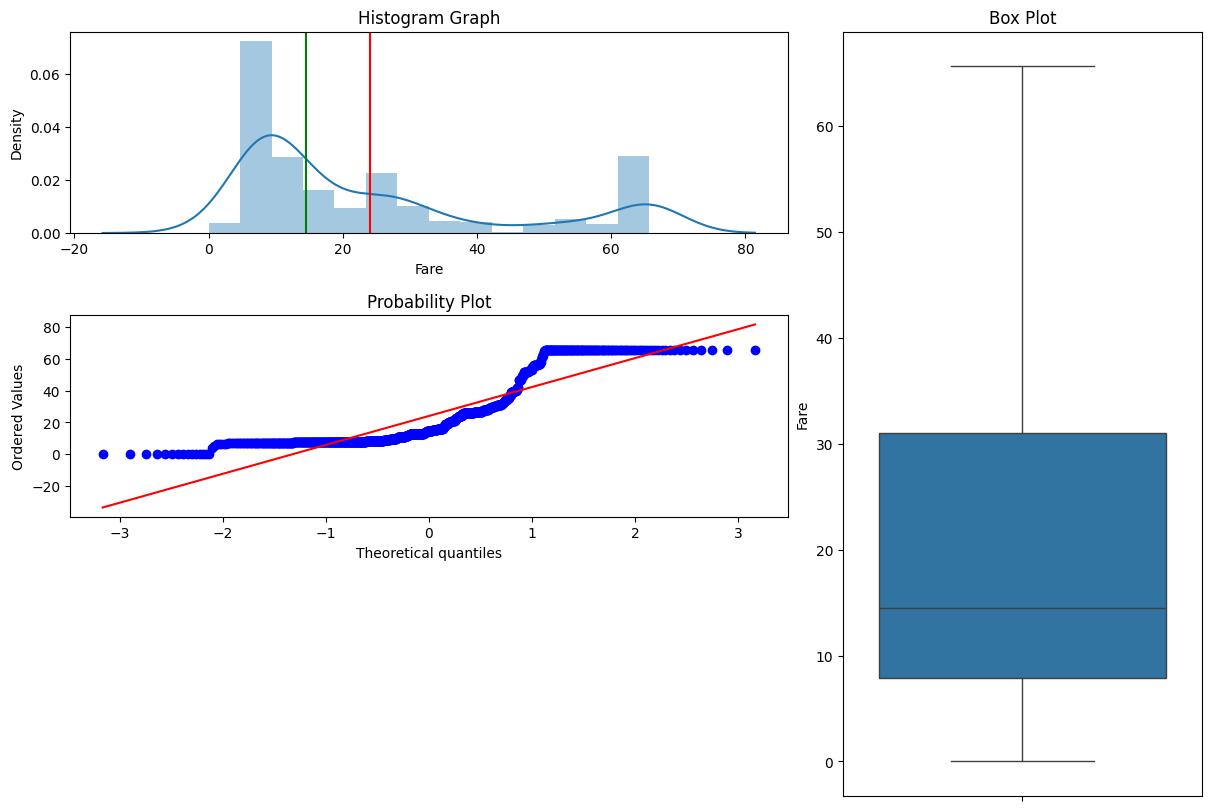

In [415]:
three_chart_plot(df_final, 'Fare')

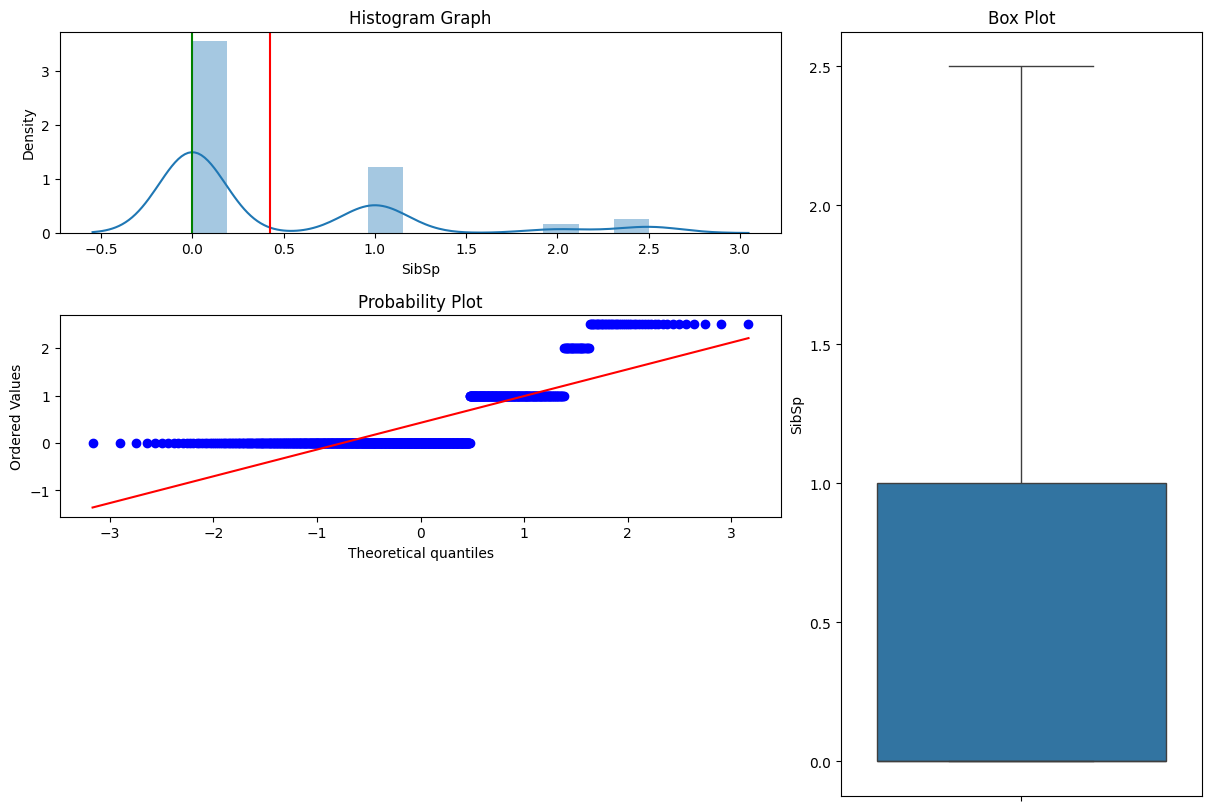

In [416]:
three_chart_plot(df_final, 'SibSp')

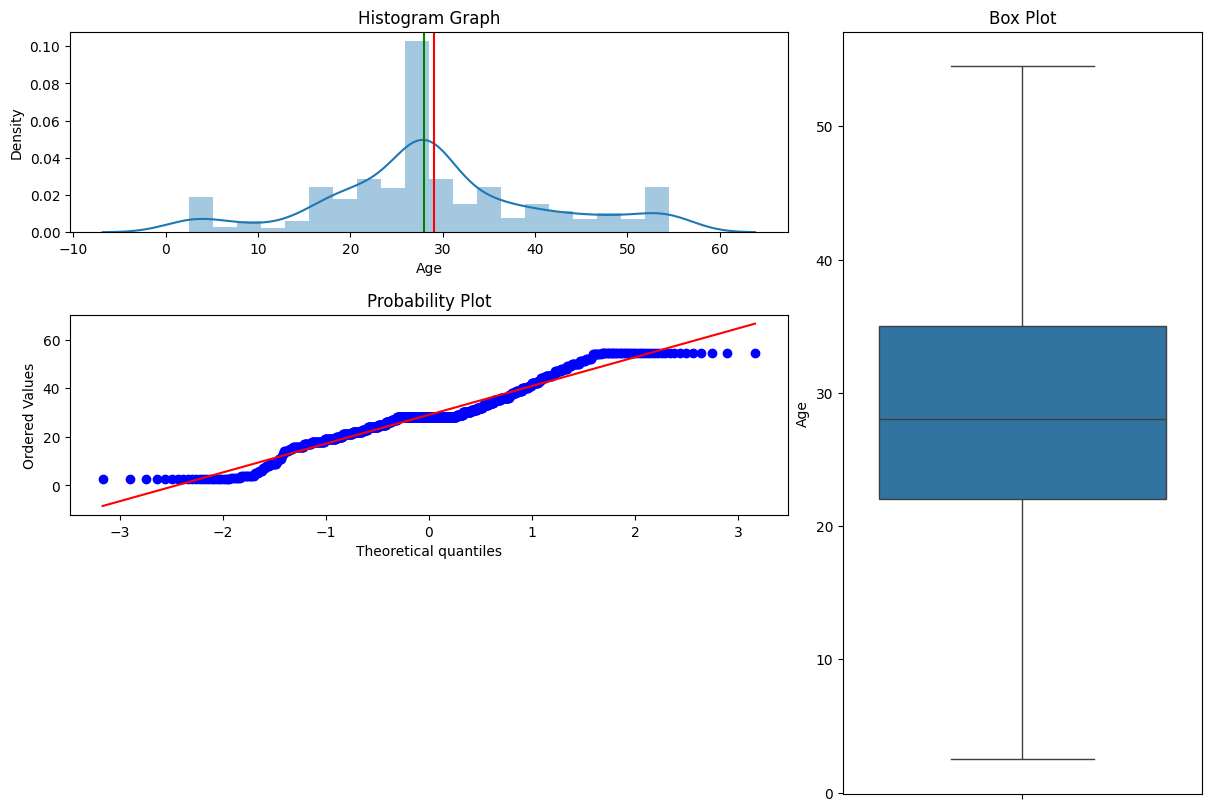

In [417]:
three_chart_plot(df_final, 'Age')

## **Analysis of Relationships Between Variables**

Analysis of Relationships Between Variables covers all statistical methods used to examine and understand the relationships between two or more variables. These analyzes are critical for discovering correlations, causal relationships, and other interactions between variables.

**Basic Components;**

1. **Correlation Analysis**
  * Pearson Correlation Coefficient
  * Spearman Rank Correlation
2. **Regression Analysis**
  * Simple Linear Regression
  * Multiple Linear Regression
3. **Chi-Square Test**
4. **Crosstab Analysis**
5. **Analiz of Variance**
  * One-Way ANOVA
  * Two-Way ANOVA
6. **Principal Component Analysis, PCA**
7. **Partial Correlation**

**Conclusion:** Analysis of relationships between variables is an important step in the data analysis process. These analyzes help understand patterns and relationships in data and provide the information necessary to make better decisions.

Now let's look at the correlation of our data set.

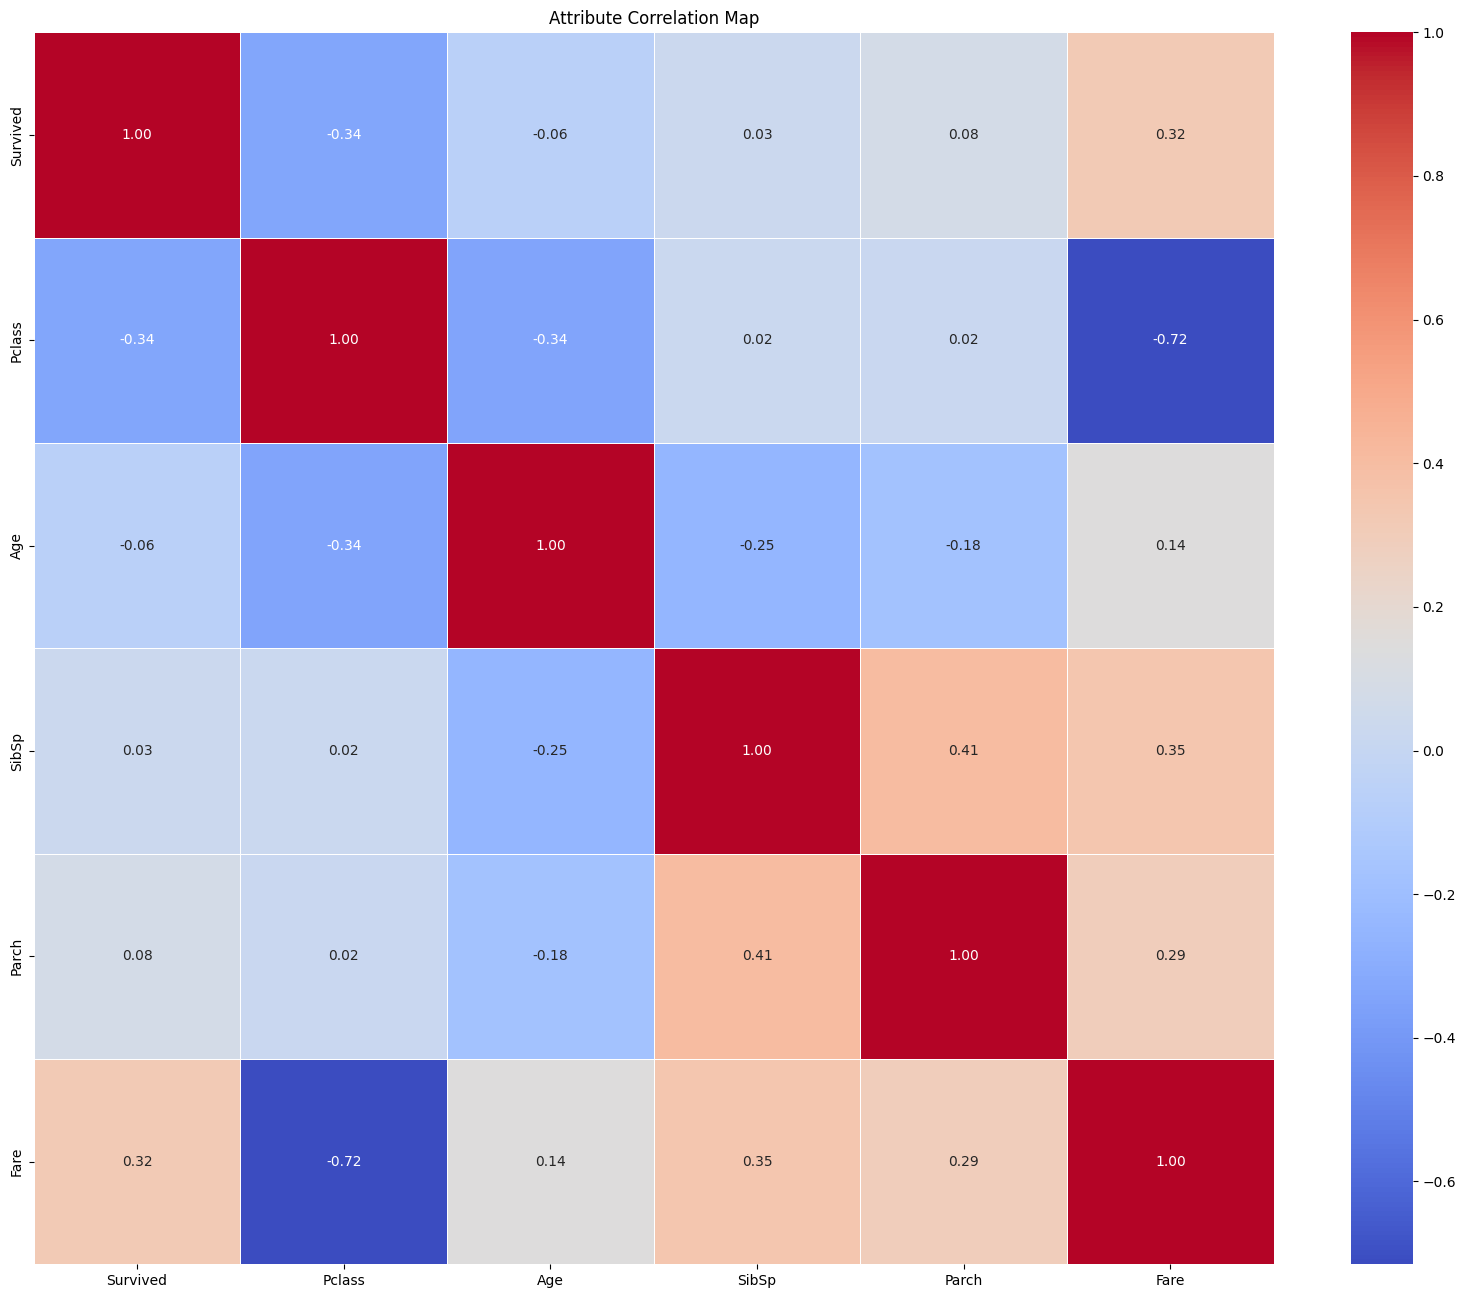

In [418]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={'size': 10}),
plt.title('Attribute Correlation Map')
plt.show()

Feature selection is an important concept in machine learning and data science projects. It is used to improve the performance of your model, reduce training times, and improve the generalization ability of the model. Basically, it is done with the aim of selecting the most effective features and removing unnecessary or less informative ones.

1. **Filtering**

  Filtering method is the process of selecting features before using machine learning algorithms. In this method, features are evaluated using statistical tests and selected independently of the modeling stage. For example, the relationship between input and output is measured using methods such as Pearson correlation coefficient, Chi-square test, ANOVA, and the attributes with the strongest relationship are selected.

2. **Wrapping**

  The wrapping method actively uses a machine learning model in the feature selection process. In this method, various feature combinations are tried and each combination is tested on the model. The performance of the model is used as an indicator of how well the features are selected.

Now let's use a model to determine feature importance. We will use RandomForestClassifier for this purpose.

In [419]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['Survived'])
y = df_final['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

rf_model = RandomForestClassifier(random_state=5)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importances_df


,Feature,Importance
4,Fare,0.266
1,Age,0.261
5,Sex_male,0.258
0,Pclass,0.084
2,SibSp,0.052
3,Parch,0.043
7,Embarked_S,0.026
6,Embarked_Q,0.011


As you can see, the feature importance determined by RandomForestClassifier is as in the output. According to these importance, the most important features are **Fare**, **Age** and **Sex_male**.

In [420]:
from sklearn.feature_selection import RFE

rfe_model = RandomForestClassifier(random_state=42)

rfe = RFE(estimator=rfe_model, n_features_to_select=3)

rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]

selected_features


Index(['Age', 'Fare', 'Sex_male'], dtype='object')

## **Feature Engineering**

Feature engineering involves creating new features or transforming existing features to improve the performance of machine learning models. Given the dataset, here are some potential feature engineering steps we could take:

1. Normalization/Standardization: Scaling numerical features to ensure they have similar ranges.
2. Interaction Terms: Creating new features by combining existing ones (e.g., Total_Purchase * Years).
3. Polynomial Features: Adding polynomial features if non-linear relationships are expected.
4. Binning: Converting continuous variables into discrete bins (e.g., Age groups).
5. Log Transformation: Applying log transformation to reduce skewness in numerical features.



Let's apply some of these transformations and create a new dataset with designed features. First, let's implement standardization. Then create interaction conditions for the selected properties. Finally, apply log transformation to reduce skewness.

In [421]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_final[['Age', 'Fare']] = scaler.fit_transform(df_final[['Age', 'Fare']])

df_final['Fare_Age'] = df_final['Fare'] * df_final['Age']
df_final['Fare_Pclass'] = df_final['Fare'] * df_final['Pclass']
df_final['Age_Pclass'] = df_final['Age'] * df_final['Pclass']

df_final['Log_Fare'] = np.log1p(df['Fare'])